<a href="https://colab.research.google.com/github/prateekghorawat/Generative-AI/blob/main/Generative%20AI%20Deep%20Dive%20Using%20Hugging%20Face%20From%20Pipelines%20to%20Quantization/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import userdata
userdata.get('HUGGINGFACE_API_KEY')
userdata.get('OPEN_API_KEY')


from huggingface_hub import login
hf_token = userdata.get('HUGGINGFACE_API_KEY')
login(hf_token, add_to_git_credential=True)

# **COMPLETE HUGGING FACE FOR GENRATIVE AI**

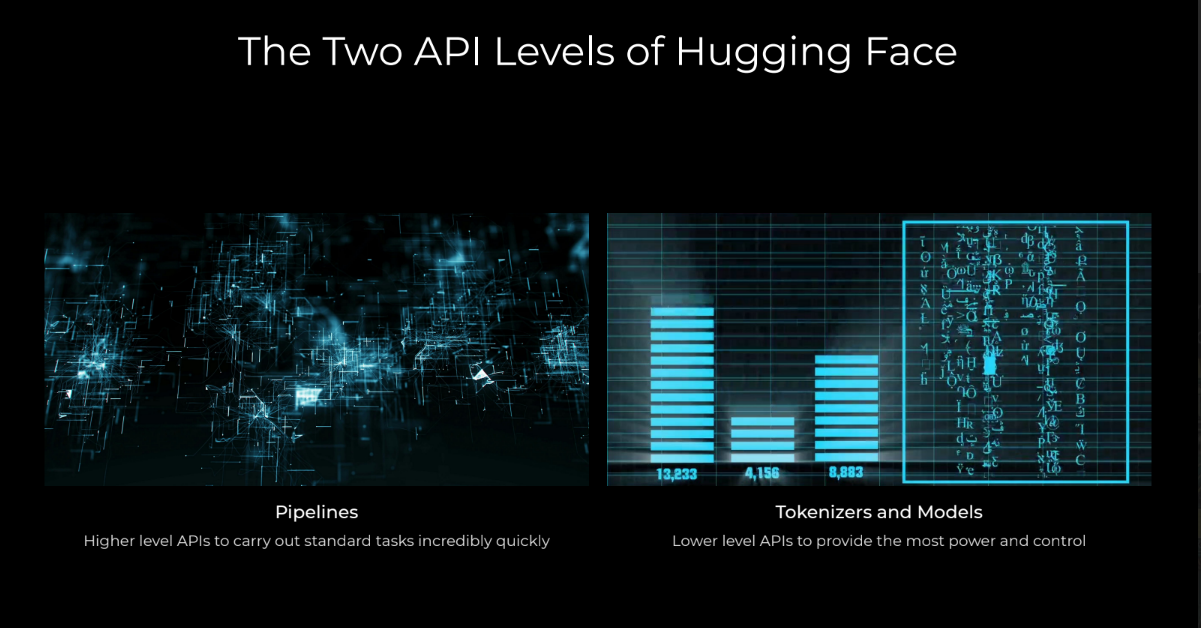

In [ ]:
import torch
from transformers import pipeline, AutoTokenizer, AutoModelForCausalLM, TextStreamer, BitsAndBytesConfig
from diffusers import StableDiffusionPipeline, FluxPipeline, AutoPipelineForText2Image
from datasets import load_dataset
import soundfile as sf
from IPython.display import Audio
import gc


## **USING HUGGING FACE PIPELINES**

### SENTIMENT ANALYSIS

In [ ]:
classifier = pipeline("sentiment-analysis" , device="cuda")
result = classifier("I am excited to learn Hugging Face dual modes")[0]
print(f"label: {result['label']}, with score: {round(result['score'], 4)}")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda


label: POSITIVE, with score: 0.9985


### Named Entity Recognition

In [ ]:
ner = pipeline("ner", grouped_entities=True, device="cuda")
result = ner("Barack Obama was the 44th president of the United States.")
print(result)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda


[{'entity_group': 'PER', 'score': np.float32(0.99918306), 'word': 'Barack Obama', 'start': 0, 'end': 12}, {'entity_group': 'LOC', 'score': np.float32(0.9986908), 'word': 'United States', 'start': 43, 'end': 56}]


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/token_classification.py:186: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


### Question Answering with Context


In [ ]:
question_answerer = pipeline("question-answering", device="cuda")
result = question_answerer(question="Who was the 44th president of the United States?", context="Barack Obama was the 44th president of the United States.")
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda


{'score': 0.9889456033706665, 'start': 0, 'end': 12, 'answer': 'Barack Obama'}


### Text Summarization


In [ ]:

summarizer = pipeline("summarization", device="cuda")
text = """The Hugging Face transformers library is an incredibly versatile and powerful tool for natural language processing (NLP).
It allows users to perform a wide range of tasks such as text classification, named entity recognition, and question answering, among others.
It's an extremely popular library that's widely used by the open-source data science community.
It lowers the barrier to entry into the field by providing Data Scientists with a productive, convenient way to work with transformer models.
"""
summary = summarizer(text, max_length=50, min_length=25, do_sample=False)
print(summary[0]['summary_text'])

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

Device set to use cuda


 The Hugging Face transformers library is an incredibly versatile and powerful tool for natural language processing . It allows users to perform a wide range of tasks such as text classification, named entity recognition, and question answering .


### Translation

In [ ]:
translator = pipeline("translation_en_to_de", device="cuda")
result = translator("The Data Scientists were truly amazed by the power and simplicity of the HuggingFace pipeline API.")
print(result[0]['translation_text'])

No model was supplied, defaulted to google-t5/t5-base and revision a9723ea (https://huggingface.co/google-t5/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda


Die Data Scientists waren wirklich erstaunt über die Leistungsfähigkeit und Einfachheit der HuggingFace Pipeline API.


In [ ]:
translator = pipeline("translation", model = "pere/nb-nn-translation" , device="cuda")
result = translator("The Data Scientists were truly amazed by the power and simplicity of the HuggingFace pipeline API.")
print(result[0]['translation_text'])

config.json:   0%|          | 0.00/722 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.10G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.10G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.62M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

Device set to use cuda


The Data Scientists also troly amazed by the power and simplipower of the HuggingFace pipelinje API.


### Classification


In [ ]:

classifier = pipeline("zero-shot-classification", device="cuda")
result = classifier("Hugging Face's Transformers library is amazing!", candidate_labels=["technology", "sports", "politics"])
print(result)

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda


{'sequence': "Hugging Face's Transformers library is amazing!", 'labels': ['technology', 'sports', 'politics'], 'scores': [0.9493839740753174, 0.03225007280707359, 0.018365919589996338]}


### Text Generation


In [ ]:
generator = pipeline("text-generation", device="cuda")
result = generator("If there's one thing I want you to remember about using HuggingFace pipelines, it's")
print(result[0]['generated_text'])

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


If there's one thing I want you to remember about using HuggingFace pipelines, it's that you can't just look in the head of any file and see if you're looking at the file. You'll have to look at your code in order to do it.

Another thing: when you start writing code, there's a lot of code in the head of that file. So, you'll have to understand that this is what you want to do.

This is the reason why it might seem like you don't want to write a lot of code. I'd say the problem is that there's a lot of code that's not there. You might not like to write anything for the sake of writing code. If you're writing code to a file, it may not have a problem because the code is there. It's not there because it doesn't exist. But the problem is that once you write code that is not there, you might not understand what you're doing.

So, if you're writing code to a file, you'll be doing things that may not work out for you. If you're writing code to a file that includes a lot of errors, you might 

### Image Generation

In [ ]:
pipe = AutoPipelineForText2Image.from_pretrained("stabilityai/sd-turbo", torch_dtype=torch.float16, variant="fp16")
pipe.to("cuda")

prompt = "A futuristic class full of students learning AI coding in a surreal style"
image = pipe(prompt=prompt, num_inference_steps=1, guidance_scale=0.0).images[0]

model_index.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

text_encoder/model.fp16.safetensors:   0%|          | 0.00/681M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/574 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/618 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

unet/diffusion_pytorch_model.fp16.safete(…):   0%|          | 0.00/1.73G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.fp16.safeten(…):   0%|          | 0.00/167M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/655 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


  0%|          | 0/1 [00:00<?, ?it/s]

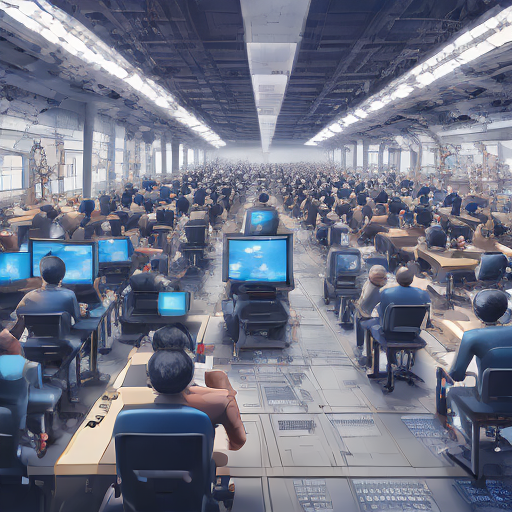

In [ ]:
display(image)

## **TOKENIZERS**

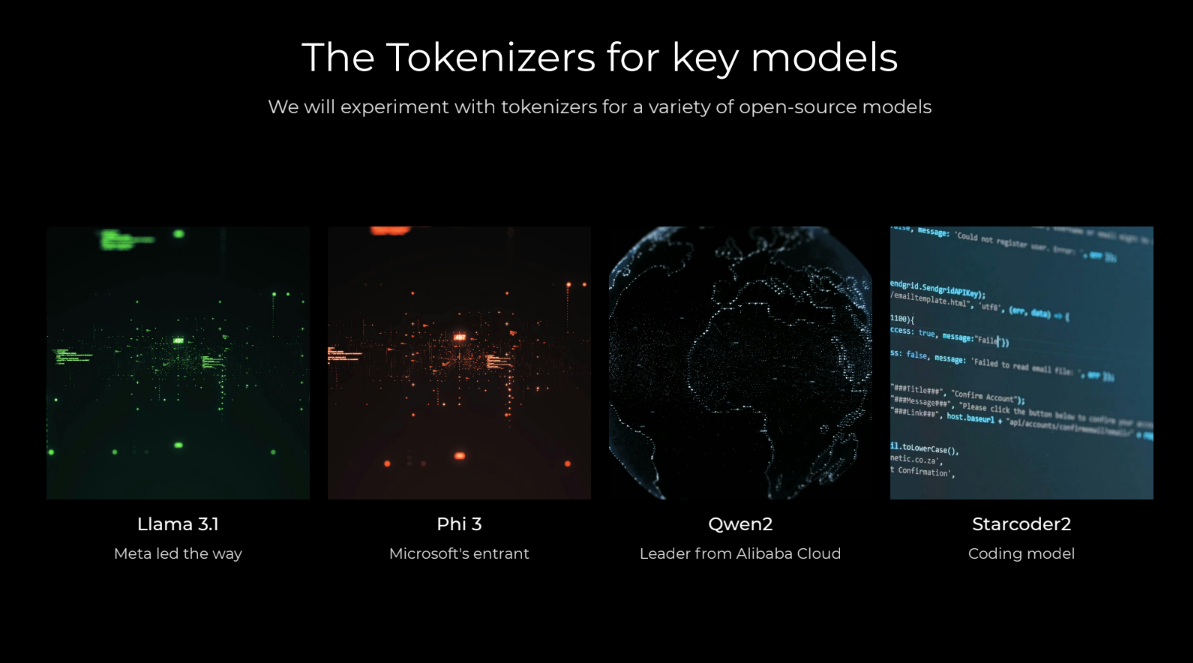

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('microsoft/Phi-3-mini-4k-instruct', trust_remote_code=True)

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/306 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/599 [00:00<?, ?B/s]

In [ ]:
text = "Understanding how Tokenizers work."
tokens = tokenizer.encode(text)
print(f"Tokens are: {tokens}\n")
print(f"Length of Tokens: {len(tokens)}\n")
print(f"Decoding Back: {tokenizer.decode(tokens)}\n")
print(f"Batch formatted Tokens: {tokenizer.batch_decode(tokens)}\n")

Tokens are: [7634, 11235, 920, 25159, 19427, 664, 29889]

Length of Tokens: 7

Decoding Back: Understanding how Tokenizers work.

Batch formatted Tokens: ['Under', 'standing', 'how', 'Token', 'izers', 'work', '.']



**Instruct variants of models**

Many models have a variant that has been trained for use in Chats.
These are typically labelled with the word "Instruct" at the end.
They have been trained to expect prompts with a particular format that includes system, user and assistant prompts.

There is a utility method apply_chat_template that will convert from the messages list format we are familiar with, into the right input prompt for this model.

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('microsoft/Phi-3-mini-4k-instruct', trust_remote_code=True)

In [ ]:

messages = [
    {"role": "system", "content": "You are a helpful assistant"},
    {"role": "user", "content": "Tell a light-hearted joke for a room of Data Scientists"}
  ]

prompt = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
print(prompt)

<|system|>
You are a helpful assistant<|end|>
<|user|>
Tell a light-hearted joke for a room of Data Scientists<|end|>
<|assistant|>



**Comparing with other Models**

In [ ]:
QWEN2_MODEL_NAME = "Qwen/Qwen2-7B-Instruct"
STARCODER2_MODEL_NAME = "bigcode/starcoder2-3b"

In [ ]:
qwen2_tokenizer = AutoTokenizer.from_pretrained(QWEN2_MODEL_NAME)
starcoder2_tokenizer = AutoTokenizer.from_pretrained(STARCODER2_MODEL_NAME, trust_remote_code=True)
text = "Understanding how Tokenizers work."
print(f"PHI: {tokenizer.encode(text)}\n")
print(f"QWEN: {qwen2_tokenizer.encode(text)}\n")
print(f"HF: {starcoder2_tokenizer.encode(text)}\n")

PHI: [7634, 11235, 920, 25159, 19427, 664, 29889]

QWEN: [70151, 1246, 9660, 12230, 975, 13]

HF: [12921, 17441, 2650, 6520, 9266, 1409, 51]



## **QUANTIZATION USING HF FUNCTIONS**

In [ ]:
LLAMA = "meta-llama/Meta-Llama-3.1-8B-Instruct"
PHI3 = "microsoft/Phi-3-mini-4k-instruct"
GEMMA2 = "google/gemma-2-2b-it"
QWEN2 = "Qwen/Qwen2-7B-Instruct"

## 1. What is Quantization?

**Quantization** in deep learning is the process of converting a model's weights and computations from a higher precision (such as 32 bits per value) down to a lower precision (such as 4 or 8 bits per value). The goal is to:

- Make models smaller, so they use less memory.
- Make models faster, especially on CPUs and consumer GPUs.
- Maintain as much accuracy as possible.

Quantization is very useful when you want to run large models on devices with limited resources (e.g., personal computers, phones, or edge devices).

## 2. What is `BitsAndBytesConfig`?

`BitsAndBytesConfig` is a configuration object from the [`bitsandbytes`](https://github.com/TimDettmers/bitsandbytes) library (integrated into Hugging Face), which lets you easily set quantization options.

Your config:

```python
from transformers import BitsAndBytesConfig

quant_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_compute_dtype=torch.bfloat16,
    bnb_4bit_quant_type="nf4"
)
```


### 3. Each Option Explained

| Option | Meaning | Example/Analogy |
| :-- | :-- | :-- |
| `load_in_4bit=True` | Load the model weights in **4-bit precision**, i.e., each weight uses only 4 bits instead of the usual 16 or 32 bits. | Imagine storing numbers using only 4 digits (like "1234"), vs. using 16 or 32 digits. It’s much more compact, but you lose some detail. |
| `bnb_4bit_use_double_quant=True` | **Double quantization**: Quantize the quantization constants themselves, further saving space. | Like zipping a folder twice instead of once, squeezing out even more space, sometimes at the cost of speed or extra complexity. |
| `bnb_4bit_compute_dtype=torch.bfloat16` | When doing calculations, convert the 4-bit values to **bfloat16** (16 bits: a common, efficient floating-point format) for all compute, balancing performance and accuracy. | It’s like doing rough math with simple numbers (4-bit), but whenever you need to do actual computation, you switch to better tools (bfloat16 math). |
| `bnb_4bit_quant_type="nf4"` | Use **Normal Float 4 (NF4)** quantization, a modern method that works better than simple linear methods for neural network weights. | Think of NF4 like using a specialized compressor designed for photos—instead of just squishing numbers, it knows how to squish them in a way that keeps the model’s “picture” clear. |

### 4. Full Example from Scratch

Here’s how you’d use this, step by step, in code:

```python
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig
import torch

# 1. Setup quantization config
quant_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_compute_dtype=torch.bfloat16,
    bnb_4bit_quant_type="nf4"
)

# 2. Choose your model (example: llama-2 7B)
model_name = "meta-llama/Llama-2-7b-chat-hf"

# 3. Load the model with quantization
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    quantization_config=quant_config,
    device_map="auto"  # Places model on available GPU/CPU
)

# 4. Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)

# 5. Use the model
prompt = "What is quantization in deep learning?"
inputs = tokenizer(prompt, return_tensors="pt").to(model.device)
outputs = model.generate(**inputs, max_new_tokens=30)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))
```





In [ ]:
messages = [
    {"role": "system", "content": "You are a helpful assistant"},
    {"role": "user", "content": "Tell some Tech Facts that usually people miss on noticing"}
  ]

In [ ]:
quant_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_compute_dtype=torch.bfloat16,
    bnb_4bit_quant_type="nf4"
)

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(LLAMA)
tokenizer.pad_token = tokenizer.eos_token
inputs = tokenizer.apply_chat_template(messages, return_tensors="pt").to("cuda")

In [ ]:
model = AutoModelForCausalLM.from_pretrained(LLAMA, device_map="auto", quantization_config=quant_config)

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
memory = model.get_memory_footprint() / 1e6
print(f"Memory footprint: {memory:,.1f} MB")

Memory footprint: 5,591.5 MB


In [ ]:
model

LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(128256, 4096)
    (layers): ModuleList(
      (0-31): 32 x LlamaDecoderLayer(
        (self_attn): LlamaAttention(
          (q_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear4bit(in_features=4096, out_features=1024, bias=False)
          (v_proj): Linear4bit(in_features=4096, out_features=1024, bias=False)
          (o_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear4bit(in_features=4096, out_features=14336, bias=False)
          (up_proj): Linear4bit(in_features=4096, out_features=14336, bias=False)
          (down_proj): Linear4bit(in_features=14336, out_features=4096, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm((4096,), eps=1e-05)
        (post_attention_layernorm): LlamaRMSNorm((4096,), eps=1e-05)
      )
    )
    (norm): LlamaRMSNorm((409

In [ ]:
outputs = model.generate(inputs, max_new_tokens=80)
print(tokenizer.decode(outputs[0]))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


<|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 26 Jul 2024

You are a helpful assistant<|eot_id|><|start_header_id|>user<|end_header_id|>

Tell some Tech Facts that usually people miss on noticing<|eot_id|><|start_header_id|>assistant<|end_header_id|>

Here are some interesting tech facts that people often miss:

1. **The first computer bug was an actual insect**: In 1947, a team of engineers was working on the Harvard Mark II computer when they found a moth stuck in one of the relays. They taped the moth to the computer log and wrote "First actual case of bug being found" next to it.


### **Wrapping in Function**

In [ ]:
def generate(model, messages):
  tokenizer = AutoTokenizer.from_pretrained(model)
  tokenizer.pad_token = tokenizer.eos_token
  inputs = tokenizer.apply_chat_template(messages, return_tensors="pt", add_generation_prompt=True).to("cuda")
  streamer = TextStreamer(tokenizer)
  model = AutoModelForCausalLM.from_pretrained(model, device_map="auto", quantization_config=quant_config)
  outputs = model.generate(inputs, max_new_tokens=80, streamer=streamer)
  del model, inputs, tokenizer, outputs, streamer
  gc.collect()
  torch.cuda.empty_cache()

In [ ]:
messages = [
    {"role": "user", "content": "Tell a light-hearted joke for a room of Data Scientists"}
  ]
generate(LLAMA, messages)

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


<|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 26 Jul 2024

<|eot_id|><|start_header_id|>user<|end_header_id|>

Tell a light-hearted joke for a room of Data Scientists<|eot_id|><|start_header_id|>assistant<|end_header_id|>

Why did the logistic regression model go to therapy?

Because it was struggling to classify its emotions.<|eot_id|>
